## 1. Download Iris dataset and make it suitable for unsupervised learning.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("Iris.csv")   # reading the data
df.head()    # first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## 2. Normalize the data 


In [2]:
df.drop(["Id"],axis=1,inplace=True)    # dropped,Since Id column is not a real feature of our flowers. 
df.head() # no id now

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# apply MinMaxScaler for iris data set, [0, 1] for the range
from sklearn.preprocessing import MinMaxScaler
df_n = df.copy()
min_max_scaler = MinMaxScaler()
df_n=x = df.iloc[:, [0,1,2,3]] #selected only numerical parameters
df_n.iloc[:, [0, 1, 2, 3]] = min_max_scaler.fit_transform(df_n.iloc[:, [0, 1, 2, 3]]) # min-max scaling
df_n.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


## 3. Display middle 10 rows.

In [4]:
df_n.info() # number of entries : 150

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
df_n[71:81] # middle value 150/2=75 so range 71 to 81 or 70 to 80

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
71,0.500000,0.333333,0.508475,0.500000
72,0.555556,0.208333,0.661017,0.583333
73,0.500000,0.333333,0.627119,0.458333
74,0.583333,0.375000,0.559322,0.500000
75,0.638889,0.416667,0.576271,0.541667
76,0.694444,0.333333,0.644068,0.541667
77,0.666667,0.416667,0.677966,0.666667
78,0.472222,0.375000,0.593220,0.583333
79,0.388889,0.250000,0.423729,0.375000
80,0.333333,0.166667,0.474576,0.416667


## 4. Display frequency variation for each feature after discretizing it

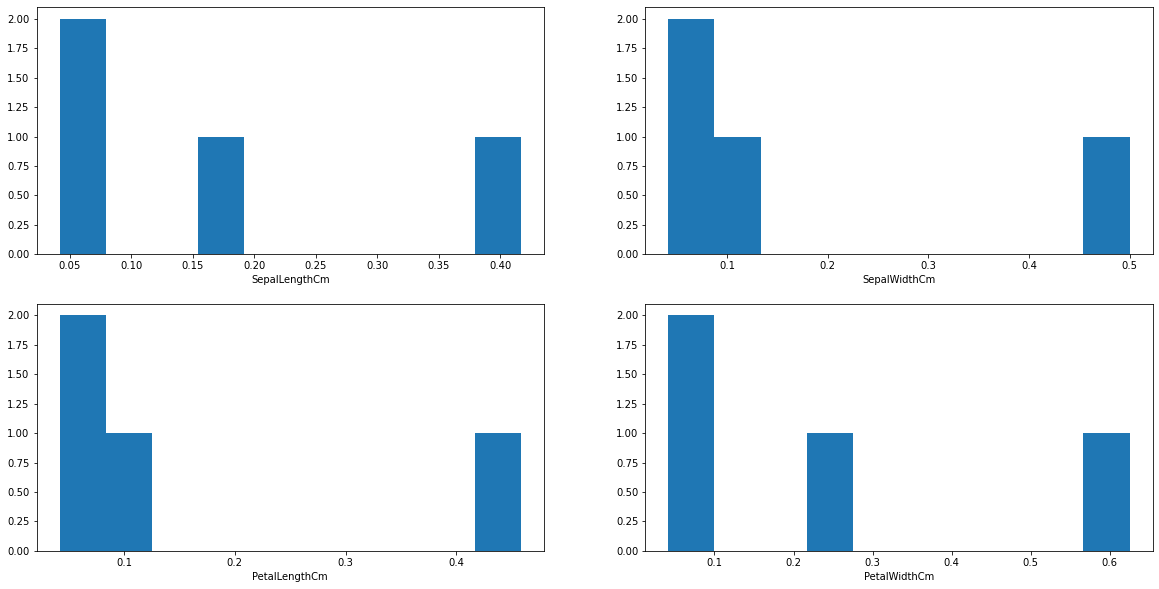

In [6]:
from matplotlib import pyplot as plt

# Figure Size
fig, ax = plt.subplots(2,2,figsize =(20, 10))
#array of title
listOfTitle=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
# Horizontal Bar Plot
for i in range(4):
    plt.hist(df_n.iloc[i])
    plt.subplot(2,2,i+1)
    plt.xlabel(listOfTitle[i])
# Show Plot
plt.show()

## 5. Display any plot to show statistical information of each feature w.r.t. labels

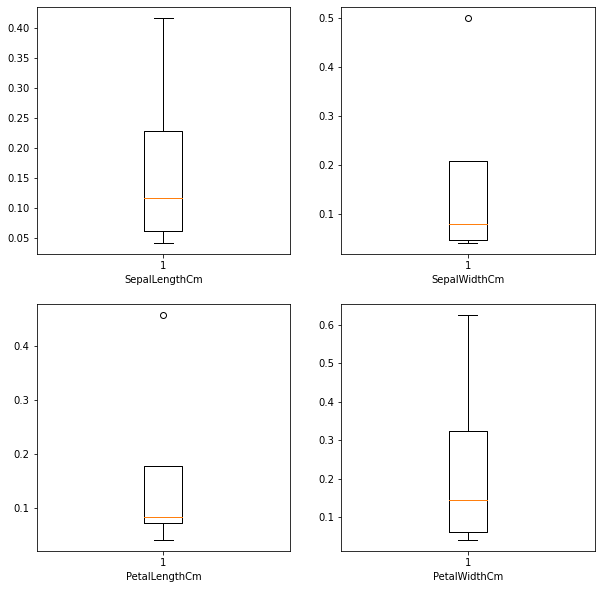

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.pairplot(data=df_n,hue="Species",palette="Set2")
fig, ax = plt.subplots(2,2,figsize =(10, 10))
#array of title
listOfTitle=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
# Horizontal Bar Plot
for i in range(4):
    plt.boxplot(df_n.iloc[i])
    plt.subplot(2,2,i+1)
    plt.xlabel(listOfTitle[i])
# Show Plot
plt.show()


## 6. Display for each value of K, the sum of squared distance between each point and the centroid in a cluster

In [8]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
df_n.to_xarray
a=euclidean_distances(df_n,df_n)
print(pd.DataFrame(a))

          0         1         2         3         4         5         6    \
0    0.000000  0.215614  0.168101  0.217612  0.050077  0.210362  0.150872   
1    0.215614  0.000000  0.101578  0.094699  0.251538  0.411637  0.190941   
2    0.168101  0.101578  0.000000  0.060472  0.187108  0.366632  0.098689   
3    0.217612  0.094699  0.060472  0.000000  0.236719  0.410594  0.132847   
4    0.050077  0.251538  0.187108  0.236719  0.000000  0.193651  0.145004   
..        ...       ...       ...       ...       ...       ...       ...   
145  1.192217  1.196014  1.232134  1.225119  1.210761  1.117888  1.215452   
146  1.076460  1.033770  1.085179  1.067305  1.102050  1.051781  1.086448   
147  1.082571  1.083907  1.120887  1.111784  1.101560  1.015059  1.105842   
148  1.149071  1.176198  1.195445  1.189842  1.159016  1.054893  1.162589   
149  0.964628  0.956495  0.988597  0.974109  0.981184  0.912295  0.970609   

          7         8         9    ...       140       141       142  \
0  

## 7. Find the optimal number of clusters for K-means clustering 

#### Implemeting the K Means Clustering

In [9]:
from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=10)        #Since we don't know the right amount of Labels


#### Finding the best amount of clusters to get most accurate results (KMeans)



#### Concepts

**ELBOW RULE, which is basically looking for a plot line that respectively has a slope nearest to 90 degrees compared to y axis and be smallest possible.**

1. WCSS concept to draw the plot by plotting WCSS values on the Y-axis and the number of clusters on the X-axis. 
2. Calculate the value for WCSS for different k values ranging from 1 to 10.   
3. Fitted the model on a matrix of features and then plotted the graph between the number of clusters and WCSS.

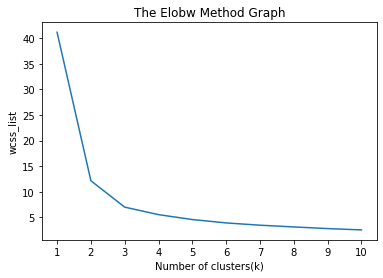

In [10]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
wcss_list= []  #Initializing the list for the values of WCSS  
#contain the value of wcss computed for different values of k ranging from 1 to 10.

#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++')  
    kmeans.fit(df_n) 
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')
plt.xticks(range(1,11))
plt.ylabel('wcss_list')  
plt.show()  


#### 3  seems to be our Best  value(s) for clusters. (By the Elbow Rule)

In [11]:
#Cluster of centers of kMean
clusters=kmeans.cluster_centers_
print(clusters)

[[0.63888889 0.48039216 0.76570289 0.89705882]
 [0.20833333 0.60625    0.08135593 0.075     ]
 [0.59502924 0.41885965 0.61552186 0.55921053]
 [0.36764706 0.33578431 0.53738784 0.50980392]
 [0.91666667 0.72222222 0.91525424 0.88888889]
 [0.11111111 0.43287037 0.06873823 0.03472222]
 [0.30324074 0.80208333 0.08898305 0.07291667]
 [0.50529101 0.32738095 0.70540759 0.72420635]
 [0.34920635 0.14285714 0.48305085 0.44047619]
 [0.87037037 0.38425926 0.89265537 0.78703704]]


In [12]:
kmeans = KMeans(n_clusters=3)  
y_predict= kmeans.fit_predict(df_n)  
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)


## 8. Display heat map


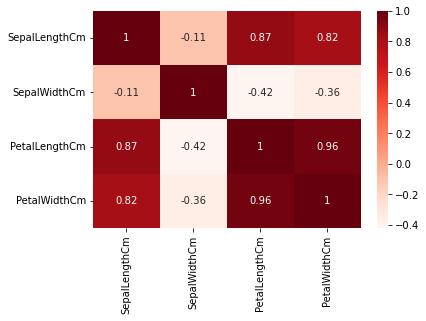

In [13]:
sns.heatmap(df_n.corr(),annot=True,cmap="Reds")
plt.show()

## 9. Use result of ques. 6 and 7 to display the result of k mean cluster in 2D plot and 3D plot

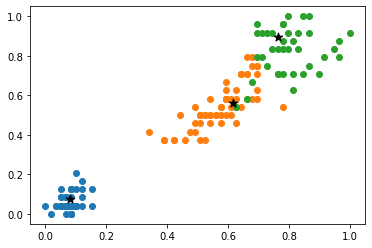

In [14]:
#visulaizing the clusters and their centroid

plt.scatter(df_n.PetalLengthCm[y_predict == 0],df_n.PetalWidthCm[y_predict == 0])
plt.scatter(df_n.PetalLengthCm[y_predict == 1],df_n.PetalWidthCm[y_predict == 1])
plt.scatter(df_n.PetalLengthCm[y_predict == 2],df_n.PetalWidthCm[y_predict == 2])
plt.scatter(clusters[0][2],clusters[0][3],marker='*',s=80,color='black') #centroid ploted against the cluster
plt.scatter(clusters[1][2],clusters[1][3],marker='*',s=80,color='black')
plt.scatter(clusters[2][2],clusters[2][3],marker='*',s=80,color='black')
plt.show()

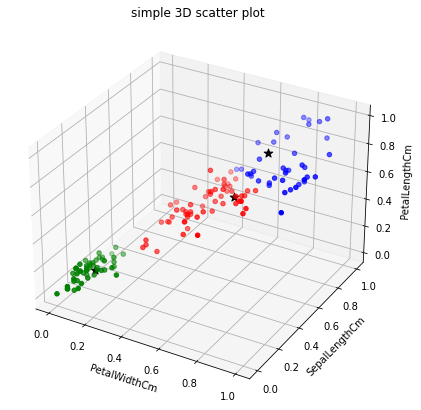

In [15]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt


# Creating dataset Cluster 1
z1 = df_n.PetalLengthCm[y_predict == 0]
x1 = df_n.PetalWidthCm[y_predict == 0]
y1 = df_n.SepalLengthCm[y_predict == 0]
# Creating dataset Cluster 2
z2 = df_n.PetalLengthCm[y_predict == 1]
x2 = df_n.PetalWidthCm[y_predict == 1]
y2 = df_n.SepalLengthCm[y_predict == 1]
# Creating dataset Cluster 3
z3 = df_n.PetalLengthCm[y_predict == 2]
x3 = df_n.PetalWidthCm[y_predict == 2]
y3 = df_n.SepalLengthCm[y_predict == 2]
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(x1, y1, z1, color = "green")
ax.scatter3D(x2, y2, z2, color = "red")
ax.scatter3D(x3, y3, z3, color = "blue")
ax.scatter3D(clusters[0][2],clusters[0][0],clusters[0][3],marker='*',s=80,color='black') #centroid ploted against the cluster
ax.scatter3D(clusters[1][2],clusters[1][0],clusters[1][3],marker='*',s=80,color='black')
ax.scatter3D(clusters[2][2],clusters[2][0],clusters[2][3],marker='*',s=80,color='black')

ax.set_zlabel('PetalLengthCm')
plt.title("simple 3D scatter plot")
plt.xlabel('PetalWidthCm')
plt.ylabel('SepalLengthCm')
# plt.zlabel('PetalLengthCm')
# show plot
plt.show()


## 10. Implement question ques. 9 using following techniques:
 

###   a. K-medoid


In [16]:
from sklearn_extra.cluster import KMedoids
import numpy as np

kmedoids = KMedoids(n_clusters=3, random_state=0).fit(df_n)
kmedoids.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
clusters=kmedoids.cluster_centers_
clusters

array([[0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.36111111, 0.29166667, 0.54237288, 0.5       ],
       [0.61111111, 0.41666667, 0.71186441, 0.79166667]])

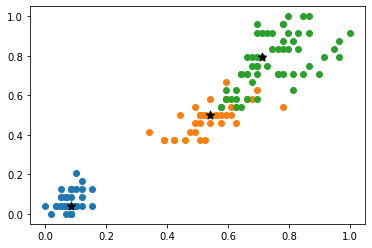

In [18]:
plt.scatter(df_n.PetalLengthCm[kmedoids.labels_ == 0],df_n.PetalWidthCm[kmedoids.labels_ == 0])
plt.scatter(df_n.PetalLengthCm[kmedoids.labels_ == 1],df_n.PetalWidthCm[kmedoids.labels_ == 1])
plt.scatter(df_n.PetalLengthCm[kmedoids.labels_ == 2],df_n.PetalWidthCm[kmedoids.labels_ == 2])
plt.scatter(clusters[0][2],clusters[0][3],marker='*',s=80,color='black') #centroid ploted against the cluster
plt.scatter(clusters[1][2],clusters[1][3],marker='*',s=80,color='black')
plt.scatter(clusters[2][2],clusters[2][3],marker='*',s=80,color='black')
plt.show()

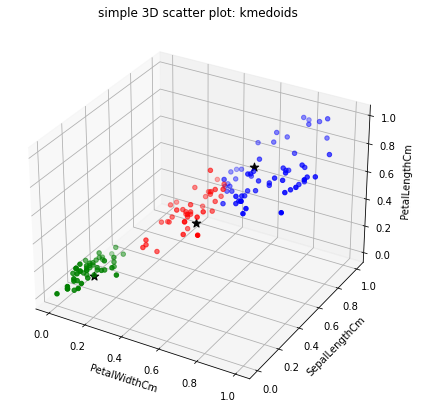

In [19]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt


# Creating dataset Cluster 1
z1 = df_n.PetalLengthCm[kmedoids.labels_ == 0]
x1 = df_n.PetalWidthCm[kmedoids.labels_ == 0]
y1 = df_n.SepalLengthCm[kmedoids.labels_ == 0]
# Creating dataset Cluster 2
z2 = df_n.PetalLengthCm[kmedoids.labels_ == 1]
x2 = df_n.PetalWidthCm[kmedoids.labels_ == 1]
y2 = df_n.SepalLengthCm[kmedoids.labels_ == 1]
# Creating dataset Cluster 3
z3 = df_n.PetalLengthCm[kmedoids.labels_ == 2]
x3 = df_n.PetalWidthCm[kmedoids.labels_ == 2]
y3 = df_n.SepalLengthCm[kmedoids.labels_ == 2]
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(x1, y1, z1, color = "green")
ax.scatter3D(x2, y2, z2, color = "red")
ax.scatter3D(x3, y3, z3, color = "blue")
ax.scatter3D(clusters[0][2],clusters[0][0],clusters[0][3],marker='*',s=80,color='black') #centroid ploted against the cluster
ax.scatter3D(clusters[1][2],clusters[1][0],clusters[1][3],marker='*',s=80,color='black')
ax.scatter3D(clusters[2][2],clusters[2][0],clusters[2][3],marker='*',s=80,color='black')

ax.set_zlabel('PetalLengthCm')
plt.title("simple 3D scatter plot: kmedoids")
plt.xlabel('PetalWidthCm')
plt.ylabel('SepalLengthCm')
# plt.zlabel('PetalLengthCm')
# show plot
plt.show()


### b. CLARANS (Clustering Large Applications based on RANdomized Search)


In [20]:

from pyclustering.cluster.clarans import clarans;
from pyclustering.utils import timedcall;
from sklearn import datasets

#import iris dataset from sklearn library
iris =  datasets.load_iris();

#get the iris data. It has 4 features, 3 classes and 150 data points.
data = iris.data

"""!
The pyclustering library clarans implementation requires
list of lists as its input dataset.
Thus we convert the data from numpy array to list.
"""
data = data.tolist()

#get a glimpse of dataset
print("A peek into the dataset : ",data[:4])


"""!
@brief Constructor of clustering algorithm CLARANS.
@details The higher the value of maxneighbor, the closer is CLARANS to K-Medoids, and the longer is each search of a local minima.
@param[in] data: Input data that is presented as list of points (objects), each point should be represented by list or tuple.
@param[in] number_clusters: amount of clusters that should be allocated.
@param[in] numlocal: the number of local minima obtained (amount of iterations for solving the problem).
@param[in] maxneighbor: the maximum number of neighbors examined.        
"""
clarans_instance = clarans(data, 3, 6, 4);

#calls the clarans method 'process' to implement the algortihm
(ticks, result) = timedcall(clarans_instance.process);
print("Execution time : ", ticks, "\n");

#returns the clusters 
clusters = clarans_instance.get_clusters();

#returns the mediods 
medoids = clarans_instance.get_medoids();


print("Index of the points that are in a cluster : ",clusters)
print("The target class of each datapoint : ",iris.target)
print("The index of medoids that algorithm found to be best : ",medoids)

A peek into the dataset :  [[5.1, 3.5, 1.4, 0.2], [4.9, 3.0, 1.4, 0.2], [4.7, 3.2, 1.3, 0.2], [4.6, 3.1, 1.5, 0.2]]
Execution time :  1.4397883689962327 

Index of the points that are in a cluster :  [[0, 4, 5, 10, 14, 15, 16, 17, 18, 19, 20, 21, 27, 28, 31, 32, 33, 36, 44, 46, 48], [1, 2, 3, 6, 7, 8, 9, 11, 12, 13, 22, 23, 24, 25, 26, 29, 30, 34, 35, 37, 38, 39, 40, 41, 42, 43, 45, 47, 49], [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]]
The target class of each datapoint :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1

In [47]:
clarans_instance = clarans(df_n, 3, 10, 4);
clarans_instance.process
x=clarans_instance.get_clusters
x
# #calls the clarans method 'process' to implement the algortihm
# (ticks, result) = timedcall(clarans_instance.process);
# print("Execution time : ", ticks, "\n");

# #returns the clusters 
# clusters = clarans_instance.get_clusters();

# #returns the mediods 
# medoids = clarans_instance.get_medoids();

<bound method clarans.get_clusters of <pyclustering.cluster.clarans.clarans object at 0x7f39151262b0>>

### c. BIRCH

In [39]:
from sklearn.cluster import Birch
brc = Birch(threshold=0.3,n_clusters=3)
brc.fit(df_n)
brc.predict(df_n)
brc.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [40]:
clusters=brc.subcluster_centers_
clusters

array([[0.22582305, 0.57638889, 0.1170747 , 0.09645062],
       [0.48881674, 0.33170996, 0.62579793, 0.61201299],
       [0.76169591, 0.48464912, 0.82247993, 0.85964912]])

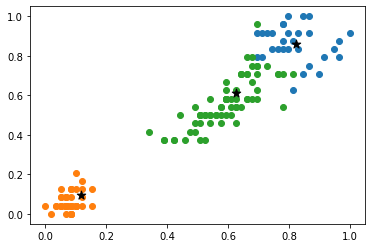

In [41]:
plt.scatter(df_n.PetalLengthCm[brc.labels_ == 0],df_n.PetalWidthCm[brc.labels_ == 0])
plt.scatter(df_n.PetalLengthCm[brc.labels_ == 1],df_n.PetalWidthCm[brc.labels_ == 1])
plt.scatter(df_n.PetalLengthCm[brc.labels_ == 2],df_n.PetalWidthCm[brc.labels_ == 2])
plt.scatter(clusters[0][2],clusters[0][3],marker='*',s=80,color='black') #centroid ploted against the cluster
plt.scatter(clusters[1][2],clusters[1][3],marker='*',s=80,color='black')
plt.scatter(clusters[2][2],clusters[2][3],marker='*',s=80,color='black')
plt.show()